<a href="https://colab.research.google.com/github/v-demydchenko/Python-for-DA/blob/main/Python_EDA_and_deep_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/third_project/ecommerce_sales_34500.csv', sep=None, engine='python')

# **Попередня обробка даних (EDA)**

In [3]:
# Перевіряємо наявність пропущених значень
missing_values = df.isnull().sum()
print(missing_values)

order_id              0
customer_id           0
product_id            0
category              0
price                 0
discount              0
quantity              0
payment_method        0
order_date            0
delivery_time_days    0
region                0
returned              0
total_amount          0
shipping_cost         0
profit_margin         0
customer_age          0
customer_gender       0
dtype: int64


In [4]:
# Перевіряємо типи даний
data_types = df.dtypes
print(data_types)

order_id               object
customer_id            object
product_id             object
category               object
price                 float64
discount              float64
quantity                int64
payment_method         object
order_date             object
delivery_time_days      int64
region                 object
returned               object
total_amount          float64
shipping_cost         float64
profit_margin         float64
customer_age            int64
customer_gender        object
dtype: object


In [5]:
# Перетворюємо 'order_date' з типу 'object' на тип 'datatime'
df['order_date'] = pd.to_datetime(df['order_date'])

In [6]:
# Перевіряємо на дублікати
duplicates = df.duplicated().sum()
print(f'Кількість дублікованих рядків: {duplicates}')

Кількість дублікованих рядків: 0


# **Аналіз даних**

**Cумма продажів по рокам**

*Тут помітно суттєве зростання у 2024 році у порівнянні з 2023. 2025 рік ще не закінчився*


In [7]:
# Виділяємо рік
df['year'] = df['order_date'].dt.year

# Розраховуємо суми продажів по роках
sales_by_year = df.groupby('year')['total_amount'].sum().reset_index()

print(sales_by_year)

   year  total_amount
0  2023     909542.28
1  2024    2931097.62
2  2025    2024653.15


**Загальна сума продажів по категоріям товарів за кожен рік**

In [8]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['year'] = df['order_date'].dt.year

profit_by_category_year = df.groupby(['category', 'year'])['total_amount'].sum().unstack(fill_value=0)

profit_by_category_year['Total'] = profit_by_category_year.sum(axis=1)

print(profit_by_category_year.sort_values(by='Total', ascending=False))

year              2023        2024        2025       Total
category                                                  
Electronics  526320.93  1671055.19  1121830.38  3319206.50
Home         163963.64   524250.25   389467.63  1077681.52
Sports        97846.33   309605.61   222373.60   629825.54
Fashion       66026.29   240339.51   165180.00   471545.80
Beauty        22947.14    78042.29    52029.95   153019.38
Toys          20291.46    67502.18    44220.16   132013.80
Grocery       12146.49    40302.59    29551.43    82000.51


**Середнє значення 'profit_margin' по категоріям**

*Як бачимо, категорія 'Grocery' має від'ємні значення і продається зі збитком, тому нижче проаналізуємо, чому так могло статися*

In [9]:
# Обчислюємо середнє значення 'profit_margin' по категоріях і роках
profit_by_category_year = df.groupby(['category', 'year'])['profit_margin'].mean().unstack(fill_value=0)

# Округлюємо значення до 2 знаків після коми
profit_by_category_year = profit_by_category_year.round(2)


profit_by_category_year

year,2023,2024,2025
category,,,
Beauty,12.30,12.14,11.64
Electronics,58.88,56.25,53.61
Fashion,19.76,21.23,20.05
Grocery,-2.15,-2.27,-2.31
Home,46.53,47.52,48.93
Sports,37.68,39.02,38.12
Toys,7.71,8.06,7.82


**Середній розмір знижки по категоріям товарів за кожен рік**

*Середній розмір знижки не більше ніж у інших категорій. Йдемо далі*

In [10]:
df['year'] = df['order_date'].dt.year

# Обчислюємо середній розмір знижки по категоріям і роках
average_discount = df.groupby(['category', 'year'])['discount'].mean().unstack(fill_value=0)

average_discount = average_discount.round(3)

average_discount

year,2023,2024,2025
category,,,
Beauty,0.052,0.049,0.049
Electronics,0.051,0.052,0.049
Fashion,0.048,0.049,0.049
Grocery,0.048,0.049,0.048
Home,0.047,0.049,0.049
Sports,0.046,0.050,0.052
Toys,0.044,0.051,0.047


**Обчислюємо кількість проданих товарів по категоріям**

In [11]:
sold_quantity_by_category = df.groupby('category')['quantity'].sum().reset_index()

sold_quantity_by_category = sold_quantity_by_category.sort_values(by='quantity', ascending=False)

sold_quantity_by_category

,category,quantity
1,Electronics,9343
2,Fashion,9148
4,Home,8229
6,Toys,6313
5,Sports,6244
0,Beauty,6122
3,Grocery,6031


**Розраховуємо відсоток повернень від загальної кількості товарів по кожній категорії**

*Відсоток повернень у товарів з категорії 'Grocery' найменший серед інших категорій. Тому рухаємось далі*


In [12]:
returns_by_category = df.groupby('category')['returned'].value_counts().unstack(fill_value=0)

returns_by_category['return_percentage'] = (returns_by_category['Yes'] / (returns_by_category['Yes'] + returns_by_category['No'])) * 100

returns_by_category['return_percentage'] = returns_by_category['return_percentage'].round(2)

returns_by_category = returns_by_category.sort_values(by='return_percentage', ascending=False)

print(returns_by_category[['return_percentage']])

returned     return_percentage
category                      
Fashion                   8.28
Electronics               7.30
Home                      5.65
Toys                      4.94
Sports                    4.94
Beauty                    3.78
Grocery                   1.31


**Виводимо відсоток shipping_cost (вартість доставки) від загальної кількості total_amount для кожної категорії**

*19.2 % від загальної суми продажів у категорії 'Grocery' витрачається на доставку, що є найбільшим значенням серед інших категорій.*




In [13]:
shipping_total_by_category = df.groupby('category')[['shipping_cost', 'total_amount']].sum().reset_index()

shipping_total_by_category['shipping_cost_percentage'] = (shipping_total_by_category['shipping_cost'] / shipping_total_by_category['total_amount']) * 100

shipping_total_by_category['shipping_cost_percentage'] = shipping_total_by_category['shipping_cost_percentage'].round(2)

shipping_total_by_category = shipping_total_by_category.sort_values(by='shipping_cost_percentage', ascending=False)

shipping_total_by_category

,category,shipping_cost,total_amount,shipping_cost_percentage
3,Grocery,15748.02,82000.51,19.20
6,Toys,19136.33,132013.80,14.50
0,Beauty,19662.55,153019.38,12.85
2,Fashion,36225.22,471545.80,7.68
5,Sports,28425.58,629825.54,4.51
4,Home,39117.36,1077681.52,3.63
1,Electronics,53933.07,3319206.50,1.62


*Підсумок: основним показником, який впливає на нерентабельність продукції із категорії 'Grocery' є завищений відсоток витрат на доставку - 19.2 %, що разом із невеликою кількістю реалізацій - 6030 може давати від'ємне значення profit_margin. В даному випадку я рекомендував би провести аналіз цін на товари категорії 'Grocery' та оптимізувати витрати на доставку.*

**Знаходимо суму продажів для кожного методу оплати**

In [14]:
sales_by_payment_method = df.groupby('payment_method')['total_amount'].sum().round().reset_index()

total_sales = sales_by_payment_method['total_amount'].sum()

sales_by_payment_method['percentage'] = (sales_by_payment_method['total_amount'] / total_sales) * 100

sales_by_payment_method['percentage'] = sales_by_payment_method['percentage'].round(2)

sales_by_payment_method = sales_by_payment_method.sort_values(by='total_amount', ascending=False)

print(sales_by_payment_method)

  payment_method  total_amount  percentage
1    Credit Card     2056787.0       35.07
2     Debit Card     1460211.0       24.90
0            COD      715572.0       12.20
4            UPI      713643.0       12.17
3         PayPal      576523.0        9.83
5         Wallet      342556.0        5.84


**Знаходимо суму продажів по регіонам**

In [15]:
sales_by_region = df.groupby('region')['total_amount'].sum().round().reset_index()

print(sales_by_region.sort_values(by='total_amount', ascending=False))

    region  total_amount
3    South     1298096.0
2    North     1264008.0
4     West     1186350.0
1     East     1176335.0
0  Central      940503.0


**Витрати на доставку по кожному регіону**

In [16]:
region_shipping_cost = df.groupby('region')['shipping_cost'].mean().round(2).reset_index()

region_shipping_cost = region_shipping_cost.sort_values(by = 'shipping_cost', ascending=False)

print(region_shipping_cost)

    region  shipping_cost
1     East           6.20
4     West           6.17
3    South           6.16
0  Central           6.12
2    North           6.11


**Кореляція між віком клієнтів та прибутком** - *кореляція відсутня*



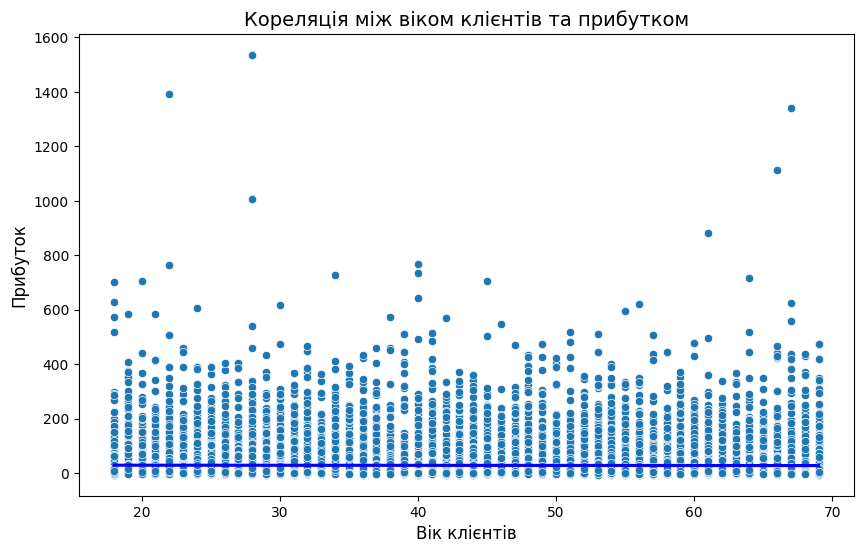

Коефіцієнт кореляції між віком клієнтів та прибутком: -0.01


In [17]:
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='customer_age', y='profit_margin')

sns.regplot(data=df, x='customer_age', y='profit_margin', scatter=False, color='blue')

plt.title('Кореляція між віком клієнтів та прибутком', fontsize=14)
plt.xlabel('Вік клієнтів', fontsize=12)
plt.ylabel('Прибуток', fontsize=12)

plt.show()

correlation = df['customer_age'].corr(df['profit_margin'])
print(f"Коефіцієнт кореляції між віком клієнтів та прибутком: {correlation:.2f}")

**Різниця у продажах між чоловіками та жінками** - *різниця несуттєва*

/tmp/ipython-input-4161229659.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_gender, x='customer_gender', y='total_amount', palette='muted')


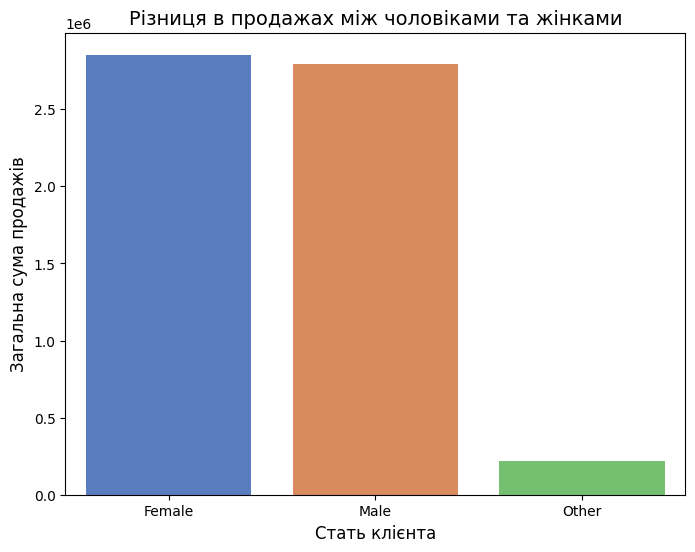

T-статистика: 0.40
P-значення: 0.68717
 Немає статистично значущої різниці між продажами чоловіків і жінок.


In [18]:
from scipy.stats import ttest_ind
sales_by_gender = df.groupby('customer_gender')['total_amount'].sum().reset_index()

# Будуємо графік для порівняння продажів між чоловіками та жінками
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_gender, x='customer_gender', y='total_amount', palette='muted')

# Додаємо заголовок та підписи осей
plt.title('Різниця в продажах між чоловіками та жінками', fontsize=14)
plt.xlabel('Стать клієнта', fontsize=12)
plt.ylabel('Загальна сума продажів', fontsize=12)

plt.show()

# Перевіряємо різниці між чоловіками та жінками за допомогою t-тесту
male_sales = df[df['customer_gender'] == 'Male']['total_amount']
female_sales = df[df['customer_gender'] == 'Female']['total_amount']

# Проведимо t-тесту для перевірки значущості різниці між двома групами
t_stat, p_value = ttest_ind(male_sales, female_sales)

print(f"T-статистика: {t_stat:.2f}")
print(f"P-значення: {p_value:.5f}")

# Інтерпретуємо результат t-тесту
if p_value < 0.05:
    print(" Є статистично значуща різниця між продажами чоловіків і жінок.")
else:
    print(" Немає статистично значущої різниці між продажами чоловіків і жінок.")

**Середній вік покупців по категоріям товарів**

In [19]:
average_age_by_category = df.groupby('category')['customer_age'].mean().round(2).reset_index()

average_age_by_category = average_age_by_category.sort_values(by = 'customer_age', ascending=False)

print(average_age_by_category)

      category  customer_age
3      Grocery         44.02
6         Toys         43.88
4         Home         43.58
0       Beauty         43.53
2      Fashion         43.53
1  Electronics         43.06
5       Sports         42.87


**Знаходимо cередній час доставки для повернутих товарів (Yes) і для товарів, які не повернули (No)**

*Для Yes час доставки становить 4.84 дні, для No - 4.81 дні;*

*Тобто, час доставки не впливає на повернення товару*

In [20]:
# Перевіряємо унікальні значення в колонці 'returned' до перетворення
print("Унікальні значення в колонці 'returned' до перетворення:", df['returned'].unique())

# Перетворюємо значення 'returned' на числові (Yes = 1, No = 0)
df['returned'] = df['returned'].apply(lambda x: 1 if x == 'Yes' else 0)

# Перевіряємо унікальні значення в колонці 'returned' після перетворення
print("Унікальні значення в колонці 'returned' після перетворення:", df['returned'].unique())

# Перевіряємо кількість повернутих та неповернутих товарів
returned_count = df[df['returned'] == 1].shape[0]
not_returned_count = df[df['returned'] == 0].shape[0]
print(f"Кількість повернутих товарів: {returned_count}")
print(f"Кількість неповернутих товарів: {not_returned_count}")

# Середній час доставки для повернутих (Yes) та неповернутих (No) товарів
mean_delivery_returned = df[df['returned'] == 1]['delivery_time_days'].mean()
mean_delivery_not_returned = df[df['returned'] == 0]['delivery_time_days'].mean()

# Виведимо результати
print(f"Середній час доставки для повернутих товарів (Yes): {mean_delivery_returned:.2f} дні")
print(f"Середній час доставки для неповернутих товарів (No): {mean_delivery_not_returned:.2f} дні")

Унікальні значення в колонці 'returned' до перетворення: ['No' 'Yes']
Унікальні значення в колонці 'returned' після перетворення: [0 1]
Кількість повернутих товарів: 1903
Кількість неповернутих товарів: 32597
Середній час доставки для повернутих товарів (Yes): 4.84 дні
Середній час доставки для неповернутих товарів (No): 4.81 дні


**Дана ML-модель надає прогноз продажів за весь 2025 рік, використовуючи вже наявні дані по продажам за 8 місяців 2025 року**

In [21]:
from sklearn.ensemble import RandomForestRegressor

df['year'] = df['order_date'].dt.year

# Агрегуємо продажі
if 'quantity' in df.columns:
    daily = df.groupby(['year', 'order_date', 'category'], as_index=False)['quantity'].sum()
    daily.rename(columns={'quantity': 'sales_count'}, inplace=True)
else:
    daily = df.groupby(['year', 'order_date', 'category'], as_index=False).size()
    daily.rename(columns={'size': 'sales_count'}, inplace=True)

# Вибираємо дані за 2025 і 2024
daily_2025 = daily[daily['year'] == 2025].copy()
daily_2024 = daily[daily['year'] == 2024].copy()

base_date = daily_2025['order_date'].min()
last_train_date = daily_2025['order_date'].max()
target_date = pd.to_datetime('2025-12-31')

# Генеруємо фічі для моделі
def add_time_features(df_dates: pd.DataFrame) -> pd.DataFrame:
    out = df_dates.copy()
    out['day_num']   = (out['order_date'] - base_date).dt.days
    out['dow']       = out['order_date'].dt.weekday
    out['dom']       = out['order_date'].dt.day
    out['month']     = out['order_date'].dt.month
    out['is_weekend']= out['dow'].isin([5,6]).astype(int)
    return out

# Тренуємо моделі та прогноз по категоріях(cat - категорія)
pred_rows = []
cats = sorted(daily_2025['category'].unique())

for cat in cats:
    cat_df = daily_2025[daily_2025['category'] == cat].sort_values('order_date')
    cat_df = add_time_features(cat_df)

    future_dates = pd.date_range(last_train_date + pd.Timedelta(days=1), target_date, freq='D')
    future_df = pd.DataFrame({'order_date': future_dates})
    future_df = add_time_features(future_df)

    features = ['day_num', 'dow', 'dom', 'month', 'is_weekend']

    if cat_df.shape[0] < 5:
        forecast_rest_2025 = cat_df['sales_count'].mean() * len(future_df)
        method = 'mean_due_to_few_samples'
    else:
        X = cat_df[features]
        y = cat_df['sales_count']
        model = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
        model.fit(X, y)

        y_pred_future = np.maximum(0.0, model.predict(future_df[features]))
        forecast_rest_2025 = y_pred_future.sum()
        method = 'rf_model'

    actual_2025_to_date = cat_df['sales_count'].sum()
    projected_2025_total = actual_2025_to_date + forecast_rest_2025

    pred_rows.append({
        'category': cat,
        'actual_2025_to_date': round(actual_2025_to_date, 2),
        'forecast_rest_2025': round(forecast_rest_2025, 2),
        'projected_2025_total': round(projected_2025_total, 2),
        'method': method
    })

result = pd.DataFrame(pred_rows)

# Додаємо дані за 2024
actual_2024 = daily_2024.groupby('category', as_index=False)['sales_count'].sum()
actual_2024.rename(columns={'sales_count': 'actual_sales_2024_total'}, inplace=True)

comparison = result.merge(actual_2024, on='category', how='left')

# Рахуємо відсоткові зміни
comparison['change_%_vs_2024'] = (
    (comparison['projected_2025_total'] - comparison['actual_sales_2024_total'])
    / comparison['actual_sales_2024_total'] * 100
).round(2)

# Виведимо результат
print(f"ML-прогноз продажів до {target_date.date()} з порівнянням із 2024 роком:\n")
print(comparison[['category',
                  'actual_sales_2024_total',
                  'actual_2025_to_date',
                  'forecast_rest_2025',
                  'projected_2025_total',
                  'change_%_vs_2024',
                  ]].to_string(index=False))

ML-прогноз продажів до 2025-12-31 з порівнянням із 2024 роком:

   category  actual_sales_2024_total  actual_2025_to_date  forecast_rest_2025  projected_2025_total  change_%_vs_2024
     Beauty                     3105                 2122              756.69               2878.69             -7.29
Electronics                     4713                 3217             1487.79               4704.79             -0.17
    Fashion                     4590                 3281             1887.24               5168.24             12.60
    Grocery                     2977                 2158             1084.65               3242.65              8.92
       Home                     4011                 2941             1348.70               4289.70              6.95
     Sports                     3051                 2229             1302.88               3531.88             15.76
       Toys                     3169                 2157              887.53               3044.53           